# Stock Market Prediction And Forecasting Using Stacked LSTM

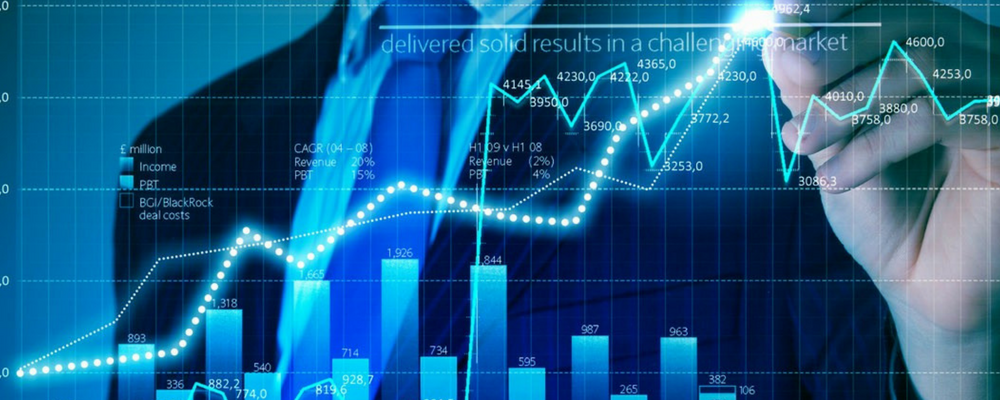

## This project is used to predict the price of a stock for future 30 days using Machine Learning,Deep Learning and Neural Networks.
## Algorithmic trading has revolutionised the stock market and its surrounding industry. Over 70% of all trades happening in the US right now are being handled by bots. Gone are the days of the packed stock exchange with suited people waving sheets of paper shouting into telephones.
## Therefore the idea for a stock predicting model originated.
## The main layer this model uses in Long Short Term Memory.


## Long Short Term Memory cells are like mini neural networks designed to allow for memory in a larger neural network. This is achieved through the use of a recurrent node inside the LSTM cell. This node has an edge looping back on itself with a weight of one, meaning at every feedfoward iteration the cell can hold onto information from the previous step, as well as all previous steps. Since the looping connection’s weight is one, old memories wont fade over time like they would in traditional RNNs.
## LTSMs and recurrent neural networks are as a result good at working with time series data thanks to their ability to remember the past. By storing some of the old state in these recurrent nodes, RNNs and LSTMs can reason about current information as well as information the network had seen one, ten or a thousand steps ago. Even better, I don’t have to write my own implementation of an LSTM cell; they’re a default layer in Tensorflow’s Keras.

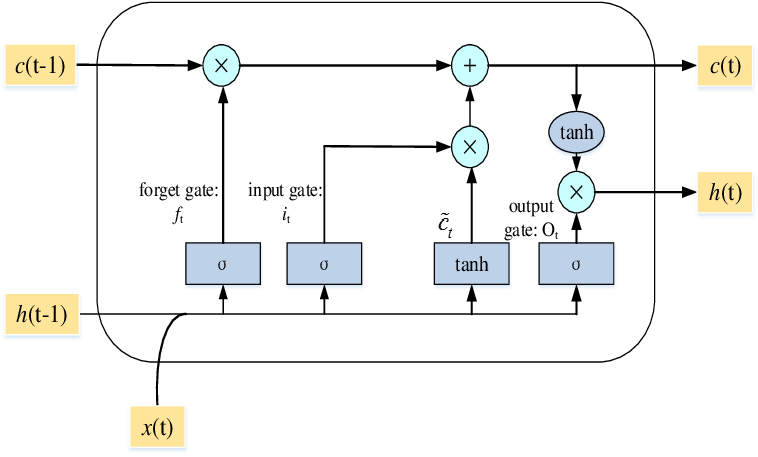


In [53]:
### Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
tf.__version__
key=""

In [2]:
from datetime import date, timedelta

current_date = date.today().isoformat()   
upto_date = (date.today()-timedelta(days=2)).isoformat() #Getting the date two days prior to the current date
upto_date 

'2020-07-24'

In [3]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end=upto_date) 
#Reading the stock report from yahoo source for Apple


In [4]:
df.to_csv('AAPL.csv') #Saving the data as CSV file

In [5]:
df=pd.read_csv('AAPL.csv') #Reading the CSV file

In [6]:
df.head() #first five rows

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [7]:
df.tail() #Last five rows

,Date,High,Low,Open,Close,Volume,Adj Close
2149,2020-07-20,394.000000,384.250000,385.670013,393.429993,22579500.0,393.429993
2150,2020-07-21,397.000000,386.970001,396.690002,388.000000,25911500.0,388.000000
2151,2020-07-22,391.899994,386.410004,386.769989,389.089996,22250400.0,389.089996
2152,2020-07-23,388.309998,368.040009,387.989990,371.380005,49251100.0,371.380005
2153,2020-07-24,371.880005,356.579987,363.950012,370.459991,46323800.0,370.459991


In [45]:
df.set_index('Date') #Setting the 'Date' as index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-07-20,394.000000,384.250000,385.670013,393.429993,22579500.0,393.429993
2020-07-21,397.000000,386.970001,396.690002,388.000000,25911500.0,388.000000
2020-07-22,391.899994,386.410004,386.769989,389.089996,22250400.0,389.089996


In [107]:
df1=df.reset_index()['Close'] #Choosing only the close values for Prediction

In [108]:
df1

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
2149    393.429993
2150    388.000000
2151    389.089996
2152    371.380005
2153    370.459991
Name: Close, Length: 2154, dtype: float64

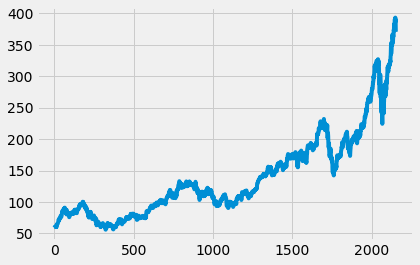

In [109]:
plt.plot(df1) #Plotting the data to view it


In [110]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [111]:
df1

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
2149    393.429993
2150    388.000000
2151    389.089996
2152    371.380005
2153    370.459991
Name: Close, Length: 2154, dtype: float64

In [112]:
scaler=MinMaxScaler(feature_range=(0,1)) #Scaling the data for uniformity
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #Reshaping it to (-1,1) and transforming the data

In [113]:
print(df1)

[[0.00875827]
 [0.00969334]
 [0.01163538]
 ...
 [0.98714608]
 [0.93469379]
 [0.93196896]]


In [114]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65) #65% training size and
test_size=len(df1)-training_size #35% test size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1] #Storing the test and training data

In [115]:
training_size,test_size #Sizes

(1400, 754)

In [116]:
train_data #The Scaled Training Data

array([[0.00875827],
       [0.00969334],
       [0.01163538],
       ...,
       [0.28521502],
       [0.28714017],
       [0.28927262]])

In [137]:
import numpy
# convert an array of values into a dataset matrix
# For this first 99 values would be used as the data and the 100th value as the target
# Therefore the timestep denotes the amount of values used to predict the future value
# This would also form out X_train,y_train,X_test and y_test data

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], [] #data and targets
    for i in range(len(dataset)-time_step-1): 
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a) #data
        dataY.append(dataset[i + time_step, 0]) #labels
    return numpy.array(dataX), numpy.array(dataY)

In [138]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [139]:
print(X_train.shape), print(y_train.shape)

(1299, 100)
(1299,)


(None, None)

In [140]:
print(X_test.shape), print(ytest.shape)

(653, 100)
(653,)


(None, None)

In [141]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [142]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1))) #First LSTM layer of 50 Neurons
model.add(LSTM(50,return_sequences=True)) #Second Layer
model.add(LSTM(50)) #Third LSTM Layer
model.add(Dense(1)) #Final layer with 1 Neuron as Output
model.compile(loss='mean_squared_error',optimizer='adam') #Using the Adam optimizer and Mean_Squared_Error as loss function


In [143]:
model.summary() #summary of the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=60,batch_size=32,verbose=1) 
#Fitting our data with epochs of 60 and a batc size of 32

Epoch 1/60
41/41 [==============================] - 14s 335ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2/60
41/41 [==============================] - 11s 273ms/step - loss: 1.9753e-04 - val_loss: 0.0018
Epoch 3/60
41/41 [==============================] - 11s 267ms/step - loss: 1.9183e-04 - val_loss: 0.0017
Epoch 4/60
41/41 [==============================] - 11s 263ms/step - loss: 1.6062e-04 - val_loss: 0.0021
Epoch 5/60
41/41 [==============================] - 11s 277ms/step - loss: 1.3806e-04 - val_loss: 0.0020
Epoch 6/60
41/41 [==============================] - 11s 274ms/step - loss: 1.2928e-04 - val_loss: 0.0013
Epoch 7/60
41/41 [==============================] - 12s 282ms/step - loss: 1.2069e-04 - val_loss: 0.0018
Epoch 8/60
41/41 [==============================] - 12s 285ms/step - loss: 1.1155e-04 - val_loss: 0.0013
Epoch 9/60
41/41 [==============================] - 12s 295ms/step - loss: 1.0714e-04 - val_loss: 8.3514e-04
Epoch 10/60
41/41 [==============================] - 11

In [145]:
###the prediction and check performance metrics
train_predict=model.predict(X_train) 
test_predict=model.predict(X_test)

In [146]:
##Transformback to original form by unscaling the data
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [147]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

103.38876118251031

In [148]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


230.1360122052268

We can see that train RMSE and Test RMSE donot have a huge difference and therefore our model is doing well.

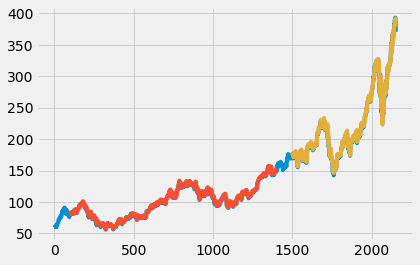

In [149]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1) #empty dataframe as df1
trainPredictPlot[:, :] = np.nan #filling with nan values
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict #Getting the data of train data prediction
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict #Getting the data of train data prediction
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) #Plotting the original data (in Blue)
plt.plot(trainPredictPlot) #Plotting the training data(in Red)
plt.plot(testPredictPlot) #Plotting the Test Predicted data (in Yellow)
plt.show()

As we can see from the above plot,our model is doing pretty good as the predicted and original graphs are almost the same

# Now lets predict the stock prices for the future 30 days using the data we have.

In [150]:
r=len(test_data)-100
r 

654

In [151]:
x_input=test_data[r:].reshape(1,-1)
x_input.shape #Taking the last 100 rows of the test data


(1, 100)

In [152]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [153]:
temp_input #the input data

[0.7314002942346889,
 0.7023161304913921,
 0.690794940041892,
 0.6230897335810577,
 0.6798661326391648,
 0.6505153332553462,
 0.5699561648747358,
 0.6580381641015374,
 0.5521265559404172,
 0.5836690099043618,
 0.56533586634179,
 0.5597381900126468,
 0.5137128563277462,
 0.49928917875748197,
 0.5659578504639087,
 0.561929889785254,
 0.6001954936362319,
 0.5685049439105945,
 0.5894443830705438,
 0.5879042684954014,
 0.5482762920988018,
 0.5601824321052449,
 0.5497571593307709,
 0.6121312799105025,
 0.6031275818323423,
 0.6227935420576711,
 0.6284800216128523,
 0.644058773816353,
 0.6849306732647087,
 0.6771709434307858,
 0.6838644922424733,
 0.6723433017929732,
 0.6549579349512529,
 0.6296054951707428,
 0.6524997351155679,
 0.6493306575467639,
 0.6728468364212263,
 0.673439219467999,
 0.6598447787397572,
 0.6869447213927582,
 0.7049223808962886,
 0.6909134347282391,
 0.703026917839549,
 0.7160585314038825,
 0.7251510779005625,
 0.7343620286986268,
 0.753287555307971,
 0.7677408339535814,

In [154]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:]) #Taking from the secong=d till the last value
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]  
        #print(temp_input)
        lst_output.extend(yhat.tolist()) #Prediction value
        i=i+1
    else:  #First iteration
        x_input = x_input.reshape((1, n_steps,1)) #Reshaping the input
        yhat = model.predict(x_input, verbose=0) #Predicting using our model
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding the predicted value to our data
        #print(len(temp_input))
        lst_output.extend(yhat.tolist()) #Predicted data
        i=i+1
    

print(lst_output)

[[0.9348078370094299], [0.9392929077148438], [0.939973771572113], [0.9376634955406189], [0.9339030981063843], [0.9296633005142212], [0.9254584312438965], [0.9215105175971985], [0.9178772568702698], [0.9145399928092957], [0.9114558100700378], [0.9085832834243774], [0.9058914184570312], [0.9033610224723816], [0.9009819030761719], [0.8987484574317932], [0.8966581225395203], [0.8947083353996277], [0.8928958773612976], [0.8912167549133301], [0.8896662592887878], [0.8882384300231934], [0.8869269490242004], [0.8857253193855286], [0.884627103805542], [0.8836258053779602], [0.8827148675918579], [0.8818883299827576], [0.8811399340629578], [0.8804636001586914]]


In [155]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131) #Predicted array

In [156]:
import matplotlib.pyplot as plt

In [157]:
l=len(df1)-100
l

2054

In [158]:
#Flattening the predicted lst_output
flat_list = []
for sublist in lst_output:
    for item in sublist:
        flat_list.append(item) 
    

In [159]:
flat_list=np.reshape(flat_list,(-1,1)) #Resizing
flat_list

array([[0.93480784],
       [0.93929291],
       [0.93997377],
       [0.9376635 ],
       [0.9339031 ],
       [0.9296633 ],
       [0.92545843],
       [0.92151052],
       [0.91787726],
       [0.91453999],
       [0.91145581],
       [0.90858328],
       [0.90589142],
       [0.90336102],
       [0.9009819 ],
       [0.89874846],
       [0.89665812],
       [0.89470834],
       [0.89289588],
       [0.89121675],
       [0.88966626],
       [0.88823843],
       [0.88692695],
       [0.88572532],
       [0.8846271 ],
       [0.88362581],
       [0.88271487],
       [0.88188833],
       [0.88113993],
       [0.8804636 ]])

Text(0.5, 1.0, 'Predicted(Red) and Original Data')

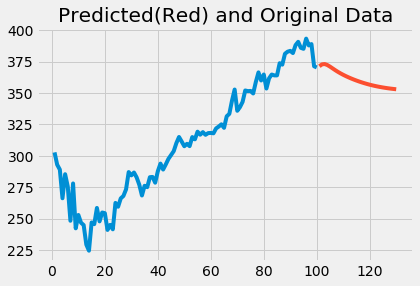

In [167]:
plt.plot(day_new,scaler.inverse_transform(df1[l:]))
plt.plot(day_pred,scaler.inverse_transform(flat_list))
plt.title('Predicted(Red) and Original Data')
#Plotting our data with predicted data

Text(0.5, 1.0, 'Graph of Unscaled Data')

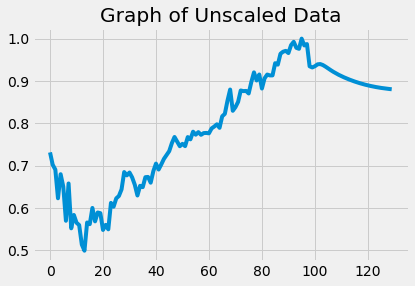

In [166]:
#Appending our data with the original data
df3=df1.tolist()
df3.extend(flat_list)
plt.plot(df3[l:])
plt.title('Graph of Unscaled Data')

In [162]:
df3=scaler.inverse_transform(df3).tolist() #Unscaling the data to its original form

Text(0.5, 1.0, 'Final Stock Graph')

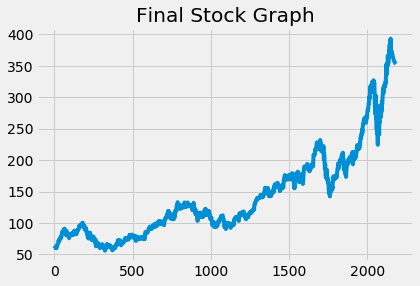

In [165]:
plt.plot(df3) #Plotting the final output
plt.title('Final Stock Graph')
